In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('/content/Mall_Customers.csv')

# Inspect the data
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


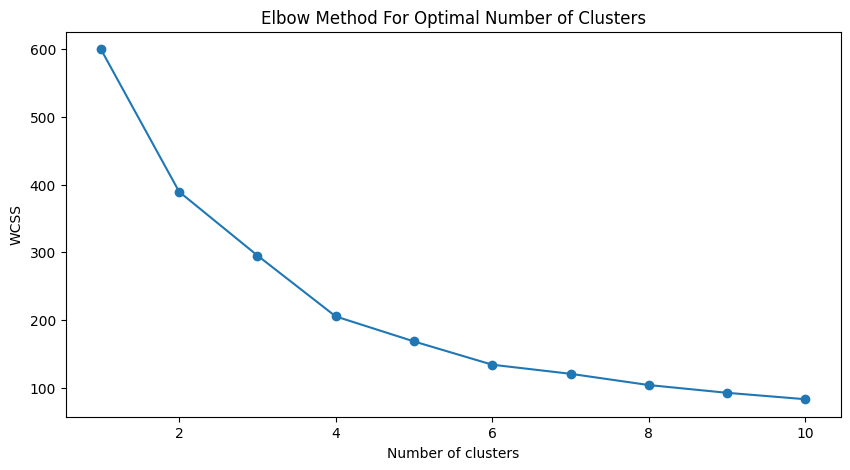

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        161.025000  32.875000           86.100000               81.525000
2         55.648148  25.185185           41.092593               62.240741
3         24.100000  46.250000           26.750000               18.350000
4        159.743590  39.871795           86.102564               19.358974


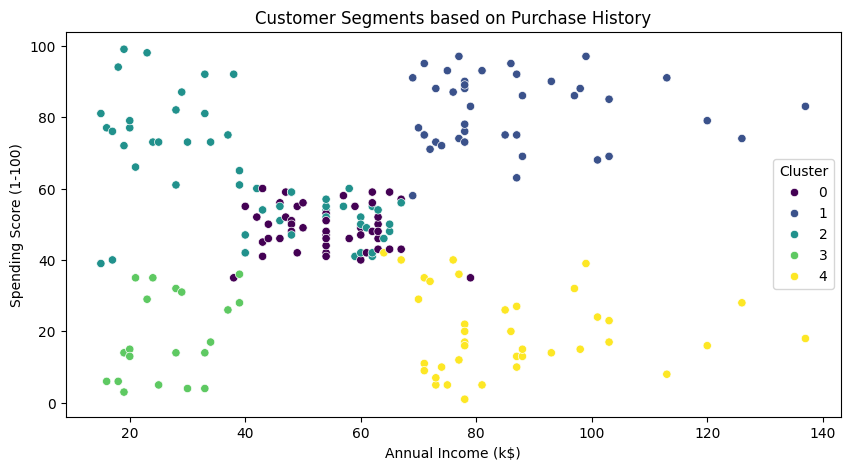

Silhouette Score: 0.41664341513732767


In [3]:
# Select relevant features
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Normalize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

# Fit the K-means model with the optimal number of clusters (e.g., 5 based on elbow method)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Analyze the clusters, excluding non-numeric columns
cluster_analysis = data.groupby('Cluster').mean(numeric_only=True)
print(cluster_analysis)

# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments based on Purchase History')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print("Silhouette Score:", silhouette_avg)